<a href="https://colab.research.google.com/github/arifpras/BelutListrik/blob/main/20250622_fpl_gk_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive  # Import the drive module from google.colab so we can access Google Drive

drive.mount('/content/drive')   # Mount (connect) your Google Drive to the path /content/drive so files can be accessed

Mounted at /content/drive


In [1]:
setwd("/content/drive/MyDrive/02fpl")  # Set the working directory to the specified folder in your Google Drive

getwd()                                # Show the current working directory to confirm the change

[1] "/content/drive/MyDrive/02fpl"

In [2]:
library(readr)   # Load the 'readr' package, which provides functions to read data (like CSV files)

library(dplyr)   # Load the 'dplyr' package, useful for data manipulation (filtering, selecting, grouping, etc.)

db00 <- read_csv("/content/drive/MyDrive/00fpl/db00all_fpl.csv", show_col_types = FALSE)
# Read the CSV file from your Google Drive into a data frame called 'db00'
# 'show_col_types = FALSE' hides the column type message

# db00 <- read_csv("https://raw.githubusercontent.com/arifpras/tfda-djppr/refs/heads/main/courses/workshop01/db00all_fpl.csv", show_col_types = FALSE)
# (Optional alternative) Load the same CSV file directly from a GitHub URL instead of Google Drive


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [3]:
glimpse(db00)  # Quickly display the structure of the 'db00' data frame: column names, types, and example values

Rows: 64,661
Columns: 40
$ name                       <chr> "Femi Seriki", "Jack Hinshelwood", "Jadon S…
$ position                   <chr> "DEF", "MID", "MID", "DEF", "MID", "GK", "M…
$ team                       <chr> "Sheffield Utd", "Brighton", "Man Utd", "Sh…
$ x_p                        <dbl> 0.5, 1.5, 3.0, 0.1, 2.1, 2.4, 0.5, 4.1, 0.0…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bps                        <dbl> 0, 0, 4, 0, 6, 0, 3, 0, 0, 0, 0, 0, 1, 15, …
$ clean_sheets               <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ creativity                 <dbl> 0.0, 0.0, 11.3, 0.0, 11.5, 0.0, 0.0, 0.0, 0…
$ element                    <dbl> 653, 621, 397, 487, 105, 607, 655, 354, 417…
$ expected_assists           <dbl> 0.00, 0.00, 0.05, 0.00, 0.01, 0.00, 0.01, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.05, 0.00, 0.03, 0.00, 0.01, 0…
$ expected_goal

In [4]:
important_vars <- c(
  "name", "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
  "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
  "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
  "influence", "minutes", "own_goals", "penalties_missed",
  "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
  "team_h_score", "threat", "transfers_balance", "value"
)
# Define a list of important columns to keep from the dataset

db01 <- db00 %>%
  select(all_of(important_vars)) %>%              # Keep only the specified columns from db00
  filter(minutes != 0, position == "GK", value >= 36) %>%  # Keep only players with non-zero minutes, who play as forwards, and have value >= 36
  mutate(value = value / 10) %>%                  # Convert player value to original scale (e.g., 100 → 10.0)
  relocate(total_points)                          # Move 'total_points' column to the front
# Create a new filtered and cleaned dataset called db01

glimpse(db01)  # Display the structure of db01: column names, types, and example values

Rows: 1,404
Columns: 30
$ total_points               <dbl> 3, 2, 2, 2, 6, 2, 3, 6, 1, 3, 3, 12, 9, 2, …
$ name                       <chr> "Thomas Kaminski", "Mark Flekken", "Aaron R…
$ position                   <chr> "GK", "GK", "GK", "GK", "GK", "GK", "GK", "…
$ team                       <chr> "Luton", "Brentford", "Arsenal", "Burnley",…
$ x_p                        <dbl> 1.9, 2.4, 3.7, 0.9, 2.9, 2.9, 4.5, 5.5, 3.2…
$ assists                    <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ bonus                      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0…
$ bps                        <dbl> 26, 17, 10, 22, 22, 18, 18, 27, 15, 16, 16,…
$ clean_sheets               <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0…
$ creativity                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ expected_assists           <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ expected_goals

In [5]:
db01 %>% head()  # Show the first 6 rows of the cleaned dataset 'db01' to get a quick look at the data

total_points,name,position,team,x_p,assists,bonus,bps,clean_sheets,creativity,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,Thomas Kaminski,GK,Luton,1.9,0,1,26,0,0,⋯,0,0,8,10715,1,1,4,0,0,4.5
2,Mark Flekken,GK,Brentford,2.4,0,0,17,0,0,⋯,0,0,4,159379,1,2,2,0,0,4.5
2,Aaron Ramsdale,GK,Arsenal,3.7,0,0,10,0,0,⋯,0,0,1,1510016,1,1,2,0,0,5.0
2,James Trafford,GK,Burnley,0.9,0,0,22,0,0,⋯,0,0,5,77149,1,3,0,0,0,4.5
6,Sam Johnstone,GK,Crystal Palace,2.9,0,0,22,1,0,⋯,0,0,1,170832,1,1,0,0,0,4.5
2,Jason Steele,GK,Brighton,2.9,0,0,18,0,0,⋯,0,0,2,490913,1,1,4,0,0,4.5


In [6]:
db01 %>%
  arrange(desc(total_points)) %>%                     # Sort the players from highest to lowest total points
  select(name, team, position, value, total_points)   # Select only key columns to display: name, team, position, value, and total points

name,team,position,value,total_points
<chr>,<chr>,<chr>,<dbl>,<dbl>
Aaron Ramsdale,Southampton,GK,4.4,16
Alphonse Areola,West Ham,GK,4.2,13
Bernd Leno,Fulham,GK,5.0,13
Mark Flekken,Brentford,GK,4.4,13
Bernd Leno,Fulham,GK,4.5,12
Robin Olsen,Aston Villa,GK,3.9,12
Nick Pope,Newcastle,GK,4.9,12
José Malheiro de Sá,Wolves,GK,4.4,12
Guglielmo Vicario,Spurs,GK,5.0,11


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



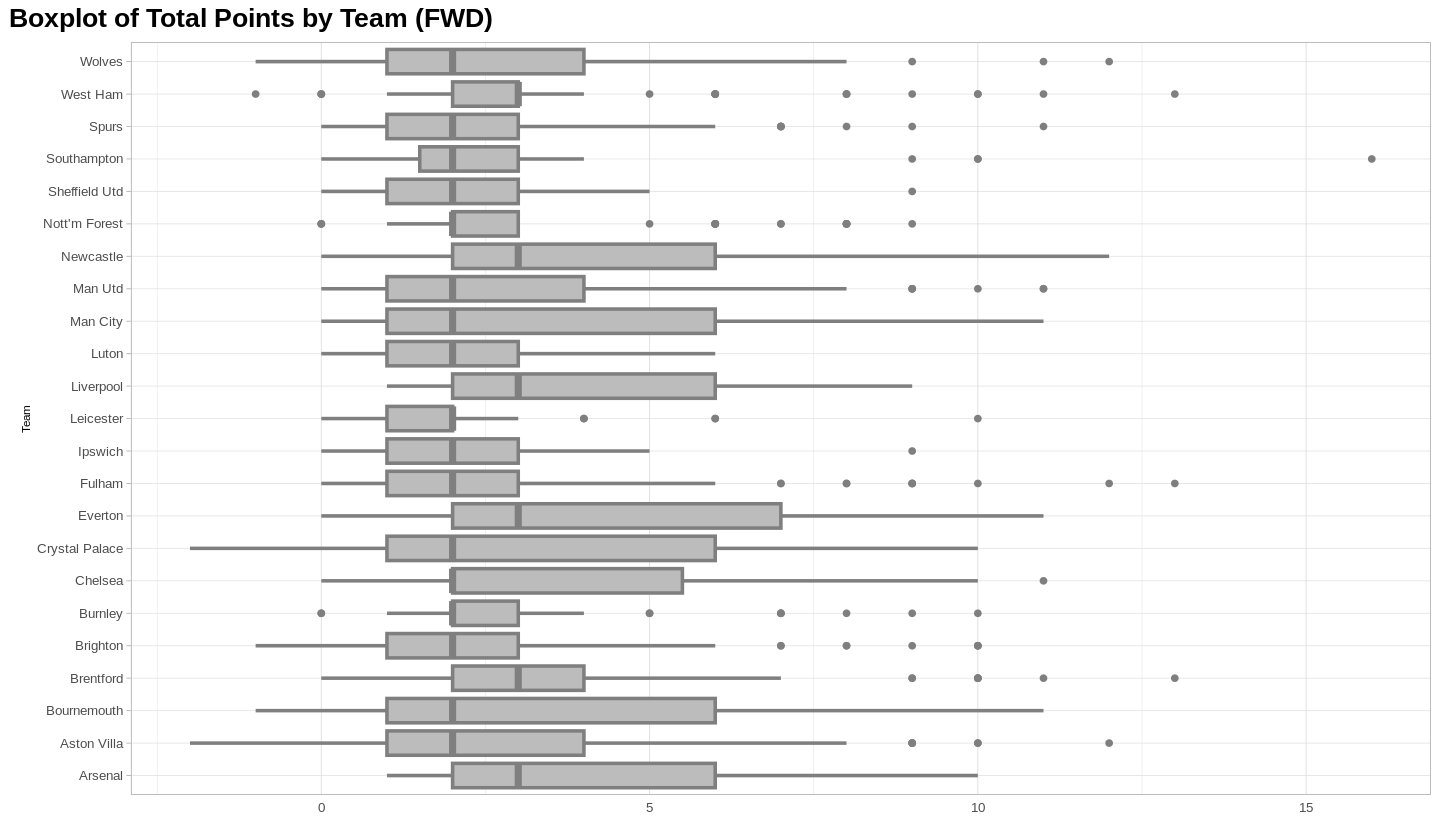

In [7]:
install.packages("colorspace")  # (Run once if not yet installed) Installs the 'colorspace' package for color customization

library(ggplot2)     # Load ggplot2 for plotting
library(colorspace)  # Load colorspace for advanced color manipulation
library(dplyr)       # Load dplyr for data manipulation

# Filter and plot
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

db01 %>%
  select(-name) %>%  # Exclude the 'name' column to simplify the plot
  ggplot(aes(x = team, y = total_points)) +  # Start a ggplot: team on x-axis (flipped later), total points on y-axis
  geom_boxplot(
    aes(
      fill = after_scale(desaturate(lighten(color, 0.7), 0.7))  # Use a lightened and desaturated version of the default fill color
    ),
    size = 1,      # Thickness of boxplot lines
    color = "grey50"  # Border color of boxplots
  ) +
  scale_fill_manual(values = NULL) +  # Allow manual fill scale (required when using after_scale, even if NULL)
  # facet_wrap(~ obsvar, scales = "free", nrow = 1) +  # (Optional) Facet if you'd like to split by another variable
  theme_light() +  # Use a clean light theme
  labs(
    title = "Boxplot of Total Points by Team (FWD)",  # Plot title
    x = "\nTeam",  # X-axis label
    y = "",        # No Y-axis label
    color = NULL   # No legend title
  ) +
  coord_flip() +  # Flip the coordinates to make team names readable (horizontal boxplots)
  theme(
    axis.text.x = element_text(size = 8),           # Customize x-axis text size
    axis.ticks.x = element_blank(),                 # Remove x-axis ticks
    axis.line.x = element_blank(),                  # Remove x-axis lines
    axis.title.x = element_text(size = 7),          # X-axis title size
    axis.text.y = element_text(size = 8),           # Y-axis (team names) text size
    axis.title.y = element_text(size = 7),          # Y-axis title size
    axis.line.y = element_blank(),                  # Remove y-axis lines
    plot.title = element_text(hjust = 0, size = 16, face = "bold"),  # Title aligned left, bold, larger size
    plot.title.position = "plot",                   # Title position
    strip.text.x = element_text(size = 8),          # Facet strip label size (if faceting)
    panel.grid.major.y = element_line(color = "grey90"),  # Light gridlines for readability
    panel.spacing = unit(1, "lines"),               # Spacing between facets (if used)
    legend.position = "none"                        # Hide legend
  )

How to Interpret the Plot:
- Each boxplot shows the distribution of total points scored by forwards (FWD) in each team.
- The thicker box represents the interquartile range (IQR), where the middle 50% of players fall.
- The line inside the box is the median — it shows the typical forward’s point output for that team.
- Longer whiskers or outliers indicate more variability or standout performers.
- Teams with higher boxes and medians generally have better-performing forwards.
- If a team has a short box with no outliers, it means their forwards perform consistently, but not necessarily well.

In [8]:
db01 %>%
  group_by(team) %>%  # Group the data by 'team'

  summarise(
    count_players = n(),                                    # Number of forwards in each team
    min_points = min(total_points, na.rm = TRUE),           # Minimum total points
    q1 = quantile(total_points, 0.25, na.rm = TRUE),        # 25th percentile (Q1)
    q2_median = median(total_points, na.rm = TRUE),         # Median (Q2)
    q3 = quantile(total_points, 0.75, na.rm = TRUE),        # 75th percentile (Q3)
    # q4 = max(total_points, na.rm = TRUE),                   # Maximum value (same as max_points, redundant here)
    max_points = max(total_points, na.rm = TRUE),           # Maximum total points (repeated for clarity)
    mean_points = mean(total_points, na.rm = TRUE),         # Mean total points
    value_weighted_avg = weighted.mean(total_points, w = value, na.rm = TRUE)  # Value-weighted average of total points
  ) %>%
  arrange(desc(q2_median))  # Sort the results by median total points (highest team medians first)

team,count_players,min_points,q1,q2_median,q3,max_points,mean_points,value_weighted_avg
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Arsenal,69,1,2.0,3,6.0,10,4.028986,4.025271
Brentford,71,0,2.0,3,4.0,13,3.464789,3.475544
Everton,69,0,2.0,3,7.0,11,4.057971,4.062576
Liverpool,69,1,2.0,3,6.0,9,3.826087,3.824965
Newcastle,70,0,2.0,3,6.0,12,3.642857,3.658159
West Ham,73,-1,2.0,3,3.0,13,3.232877,3.225933
Aston Villa,73,-2,1.0,2,4.0,12,3.095890,3.097784
Bournemouth,69,-1,1.0,2,6.0,11,3.463768,3.449647
Brighton,69,-1,1.0,2,3.0,10,2.898551,2.901639


In [9]:
install.packages("stargazer")  # (Run once) Install the 'stargazer' package for beautiful summary tables

library(stargazer)  # Load the stargazer package

db01 %>%
  as.data.frame() %>%                            # Convert tibble to standard data frame (stargazer prefers base data frames)
  stargazer(type = 'text',                      # Output the summary as plain text (other options: 'html', 'latex')
            out = "descsumm01_gk.txt",         # Save the summary output to a text file named "descsumm01_fwd.txt"
            digits = 1)                         # Round all numeric summaries to 1 decimal place

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 





Statistic                    N     Mean    St. Dev.    Min       Max   
-----------------------------------------------------------------------
total_points               1,404    3.2       2.7       -2       16    
x_p                        1,404    2.9       1.9      -1.1     13.4   
assists                    1,404   0.01       0.1       0         1    
bonus                      1,404    0.2       0.7       0         3    
bps                        1,404   15.6       9.5      -20       46    
clean_sheets               1,404    0.2       0.4       0         1    
creativity                 1,404    0.4       2.0      0.0      20.0   
expected_assists           1,404   0.002     0.01      0.0       0.2   
expected_goal_involvements 1,404   0.002     0.01      0.0       0.2   
expected_goals             1,404   0.000     0.002     0.0       0.1   
expected_goals_conceded    1,404    1.5       0.9      0.03      7.3   
goals_conceded             1,404    1.5       1.3       0      

In [10]:
install.packages("parameters")  # (Run once) Install the 'parameters' package to compute advanced descriptive statistics

library(dplyr)       # Load dplyr for data manipulation
library(parameters)  # Load parameters for descriptive summary functions

# Get the summary as a data frame
descsumm02 <- db01 %>%
  select(where(is.numeric)) %>%      # Select only numeric columns from db01
  describe_distribution()            # Generate descriptive stats (mean, SD, skewness, kurtosis, etc.)

descsumm02  # View the summary table

# Save it as plain text
capture.output(
  print(descsumm02, digits = 1),     # Format the output with 1 decimal precision
  file = "descsumm02_gk.txt"        # Save the printed summary to a file named "descsumm02_fwd.txt"
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bayestestR’, ‘datawizard’, ‘insight’




Variable,Mean,SD,IQR,Min,Max,Skewness,Kurtosis,n,n_Missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
total_points,3.239316e+00,2.677164e+00,3.00,-2.00,16.00,1.27480157,1.03765569,1404,0
x_p,2.918091e+00,1.935916e+00,2.50,-1.10,13.40,0.83293109,1.80696434,1404,0
assists,7.122507e-03,8.412382e-02,0.00,0.00,1.00,11.73462131,135.89491799,1404,0
bonus,2.378917e-01,6.735742e-01,0.00,0.00,3.00,2.92611331,7.67353839,1404,0
bps,1.557692e+01,9.477162e+00,13.00,-20.00,46.00,0.09679286,0.02083628,1404,0
clean_sheets,2.193732e-01,4.139694e-01,0.00,0.00,1.00,1.35771919,-0.15682401,1404,0
creativity,4.070513e-01,2.041564e+00,0.00,0.00,20.00,5.23652327,28.40528029,1404,0
expected_assists,1.538462e-03,9.204918e-03,0.00,0.00,0.20,15.43911732,292.24071660,1404,0
expected_goal_involvements,1.595442e-03,9.394582e-03,0.00,0.00,0.20,14.78569092,270.77952325,1404,0


In [11]:
install.packages("corrr")  # (Run once) Install the 'corrr' package to compute and format correlation matrices

library(corrr)  # Load the corrr package

corr01 <- db01 %>%
  select(where(is.numeric)) %>%  # Keep only numeric columns from db01
  correlate() %>%                # Compute pairwise correlations between all numeric variables
  # shave() %>%                 # (Optional) Remove the upper triangle of the correlation matrix
  fashion()                     # Format the correlation matrix for cleaner display (aligns numbers, adds spacing)

corr01  # Display the formatted correlation table

# Save the output as a plain text file
capture.output(print(corr01), file = "corr01_gk.txt")  # Write the result to "corr01_fwd.txt"

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘iterators’, ‘permute’, ‘ca’, ‘foreach’, ‘gclus’, ‘qap’, ‘registry’, ‘TSP’, ‘vegan’, ‘ggrepel’, ‘seriation’


Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


term,total_points,x_p,assists,bonus,bps,clean_sheets,creativity,expected_assists,expected_goal_involvements,⋯,penalties_saved,red_cards,saves,selected,starts,team_a_score,team_h_score,threat,transfers_balance,value
<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,⋯,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>,<noquote>
total_points,,.39,.18,.73,.82,.83,.14,.01,.00,⋯,.28,-.05,.25,.08,.10,-.28,-.29,-.03,.03,.07
x_p,.39,,.03,.28,.34,.36,.02,.00,.00,⋯,.03,.03,.00,.28,.16,-.10,-.12,-.01,.34,.29
assists,.18,.03,,.16,.15,.06,.37,.18,.18,⋯,-.01,-.00,.02,-.01,.01,-.02,.07,-.00,.04,.04
bonus,.73,.28,.16,,.57,.46,.16,.01,.01,⋯,.20,-.01,.29,.03,.04,-.19,-.20,-.01,-.01,.01
bps,.82,.34,.15,.57,,.66,.13,.01,.00,⋯,.16,-.05,.42,.07,.13,-.20,-.21,-.04,.04,.07
clean_sheets,.83,.36,.06,.46,.66,,.06,-.01,-.01,⋯,-.03,-.01,-.09,.08,.06,-.24,-.24,-.02,.05,.12
creativity,.14,.02,.37,.16,.13,.06,,.35,.34,⋯,.04,-.01,.02,.01,.03,-.00,.00,-.01,-.01,.01
expected_assists,.01,.00,.18,.01,.01,-.01,.35,,.98,⋯,.00,-.00,-.03,.04,.02,.05,-.01,.01,-.02,.04
expected_goal_involvements,.00,.00,.18,.01,.00,-.01,.34,.98,,⋯,.00,-.00,-.03,.04,.02,.05,-.01,.17,-.02,.05


In [12]:
db01 %>%
  select(where(is.numeric)) %>%         # Select only numeric columns from db01
  correlate() %>%                        # Compute pairwise correlations between numeric variables
  as.data.frame() %>%                    # Convert the correlation matrix to a regular data frame
  write.csv("corr01_gk.csv", row.names = FALSE)  # Save it as a CSV file without row names

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite

Warning message in stats::cor(x = x, y = y, use = use, method = method):
“the standard deviation is zero”
Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


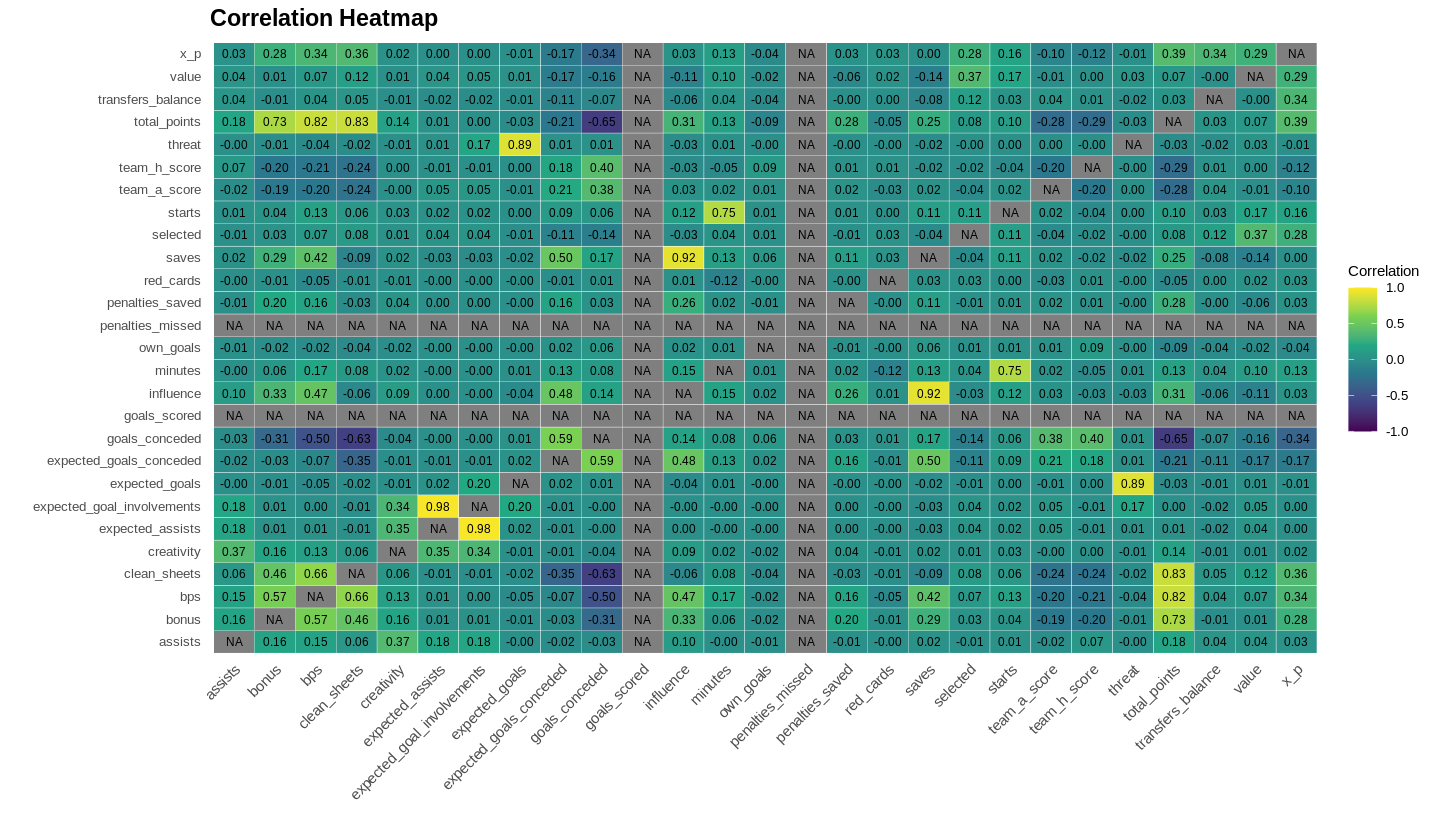

In [13]:
install.packages("viridis")  # (Run once) Install the 'viridis' package for colorblind-friendly color scales

library(corrr)     # For calculating correlations
library(dplyr)     # For data manipulation
library(tidyr)     # For reshaping data
library(ggplot2)   # For plotting
library(viridis)   # For advanced color palettes (colorblind-friendly)

# Step 1: Compute correlations
corr_matrix <- db01 %>%
  select(where(is.numeric)) %>%  # Select only numeric columns
  correlate()                    # Compute correlation matrix

# Step 2: Reshape to long format (for ggplot heatmap)
corr_long <- corr_matrix %>%
  pivot_longer(-term, names_to = "variable", values_to = "correlation")  # Convert wide matrix to long format

# Step 3: Create heatmap plot object
options(repr.plot.width = 12, repr.plot.height = 7)  # Set before plotting

corr_plot <- ggplot(corr_long, aes(x = term, y = variable, fill = correlation)) +
  geom_tile(color = "white") +                                   # Create colored squares for each correlation
  geom_text(aes(label = sprintf("%.2f", correlation)), size = 2.5, color = "black") +  # Show correlation with exactly two decimals
  scale_fill_viridis_c(option = "D", limits = c(-1, 1), name = "Correlation") +  # Apply viridis color scale from -1 to 1
  # coord_fixed() +                                                # Fix aspect ratio for square tiles
  theme_minimal() +                                              # Use a clean minimal theme
  theme(
    axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),  # Rotate x-axis labels for readability
    axis.text.y = element_text(size = 8),
    panel.grid = element_blank(),
    plot.title = element_text(size = 14, face = "bold", hjust = 0),
    legend.title = element_text(size = 9),
    legend.text = element_text(size = 8)
  ) +
  labs(title = "Correlation Heatmap", x = "", y = "")  # Set title and remove axis labels

corr_plot  # Display the heatmap in the notebook

# Step 4: Save to PDF
ggsave("heatmap01_gk.pdf", plot = corr_plot, width = 11.7, height = 8.3, dpi = 300)  # Export the plot to a landscape A4 PDF

In [14]:
# library(tidyverse)  # (Optional) Load the full tidyverse suite if needed
library(tidyr)        # Load tidyr for data reshaping functions like pivot_longer()

db02 <- db01 %>%
  select(-name) %>%                  # Remove the 'name' column to simplify the reshaped data
  relocate(team, position) %>%      # Move 'team' and 'position' columns to the front
  pivot_longer(                     # Reshape the data from wide to long format:
    cols = total_points:value,      # Convert all columns from 'total_points' to 'value' into key-value pairs
    names_to = "obsvar",            # Store original column names in a new column called 'obsvar'
    values_to = "obsval"            # Store the corresponding values in a column called 'obsval'
  )

glimpse(db02)  # Display the structure of the reshaped dataset

Rows: 37,908
Columns: 4
$ team     <chr> "Luton", "Luton", "Luton", "Luton", "Luton", "Luton", "Luton"…
$ position <chr> "GK", "GK", "GK", "GK", "GK", "GK", "GK", "GK", "GK", "GK", "…
$ obsvar   <chr> "total_points", "x_p", "assists", "bonus", "bps", "clean_shee…
$ obsval   <dbl> 3.0, 1.9, 0.0, 1.0, 26.0, 0.0, 0.0, 0.0, 0.0, 0.0, 4.1, 4.0, …


In [15]:
# important_vars <- c(
#   "name", "total_points", "position", "team", "x_p", "assists", "bonus", "bps",
#   "clean_sheets", "creativity", "expected_assists", "expected_goal_involvements",
#   "expected_goals", "expected_goals_conceded", "goals_conceded", "goals_scored",
#   "influence", "minutes", "own_goals", "penalties_missed",
#   "penalties_saved", "red_cards", "saves", "selected", "starts", "team_a_score",
#   "team_h_score", "threat", "transfers_balance", "value"
# )

important_vars <- c(
  "total_points", "team", "clean_sheets", "creativity", "expected_goal_involvements",
  "influence", "minutes", "penalties_saved", "saves", "selected", "starts",
  "threat", "transfers_balance", "value"
)
# Define a list of important variables (column names) to include in the new dataset

db03 <- db01 %>%
  select(all_of(important_vars)) %>%  # Select only the specified variables from db01
  relocate(total_points)              # Move 'total_points' column to the front for easier reference

glimpse(db03)  # Display the structure of the new dataset (column types and example values)

Rows: 1,404
Columns: 14
$ total_points               <dbl> 3, 2, 2, 2, 6, 2, 3, 6, 1, 3, 3, 12, 9, 2, …
$ team                       <chr> "Luton", "Brentford", "Arsenal", "Burnley",…
$ clean_sheets               <dbl> 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0…
$ creativity                 <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1…
$ expected_goal_involvements <dbl> 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0.00, 0…
$ influence                  <dbl> 0.0, 0.0, 12.6, 0.0, 7.4, 22.2, 33.8, 18.4,…
$ minutes                    <dbl> 90, 90, 90, 90, 90, 90, 90, 90, 90, 90, 90,…
$ penalties_saved            <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ saves                      <dbl> 8, 4, 1, 5, 1, 2, 5, 1, 4, 4, 4, 9, 6, 1, 1…
$ selected                   <dbl> 10715, 159379, 1510016, 77149, 170832, 4909…
$ starts                     <dbl> 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1…
$ threat                     <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0…
$ transfers_bala

In [43]:
db03$team <- factor(db03$team)  # Convert the 'team' column to a factor (categorical variable)

db03$team <- relevel(db03$team, ref = "Man City")
# Set "Man City" as the reference category for the 'team' factor.
# This means all other team coefficients in the regression will be compared to "Man City"

ols_gk_base <- lm(total_points ~ ., data = db03)
# Fit a linear regression model predicting total_points using all other variables in db03
# (The "." means "use all remaining columns as predictors")

# ols_fwd_robust <- lm_robust(
#   total_points ~ ., data = db03, se_type = "stata"
# )
# (Optional) Robust version using heteroskedasticity-consistent standard errors (commented out)

summary(ols_gk_base)  # Print the summary of the OLS regression model

# summary(ols_fwd_robust)
# Print the robust regression summary (if using the lm_robust version)


Call:
lm(formula = total_points ~ ., data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.2308 -0.6045 -0.0396  0.6367  5.1697 

Coefficients:
                             Estimate Std. Error t value Pr(>|t|)    
(Intercept)                -2.817e-01  5.006e-01  -0.563   0.5737    
teamArsenal                -1.691e-02  1.710e-01  -0.099   0.9212    
teamAston Villa            -2.093e-01  1.635e-01  -1.279   0.2010    
teamBournemouth            -9.057e-02  1.772e-01  -0.511   0.6093    
teamBrentford               1.268e-01  1.759e-01   0.721   0.4712    
teamBrighton                6.749e-02  1.788e-01   0.377   0.7060    
teamBurnley                -7.964e-02  2.102e-01  -0.379   0.7048    
teamChelsea                -3.877e-02  1.737e-01  -0.223   0.8234    
teamCrystal Palace         -1.981e-01  1.761e-01  -1.125   0.2608    
teamEverton                -6.874e-02  1.744e-01  -0.394   0.6935    
teamFulham                 -8.345e-02  1.686e-01  -0.495   0.6208    


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Best lambda: 0.02317516 


35 x 1 sparse Matrix of class "dgCMatrix"
                                      s0
(Intercept)                 1.205452e-01
teamArsenal                 1.440590e-02
teamAston Villa             .           
teamBournemouth             .           
teamBrentford               1.279340e-01
teamBrighton                4.722621e-02
teamBurnley                 .           
teamChelsea                 .           
teamCrystal Palace          .           
teamEverton                 .           
teamFulham                  .           
teamIpswich                -3.789244e-02
teamLeicester              -1.330540e-01
teamLiverpool               5.194770e-02
teamLuton                  -5.243236e-02
teamMan Utd                 .           
teamNewcastle              -6.191713e-02
teamNott'm Forest           .           
teamSheffield Utd          -1.586181e-01
teamSouthampton             .           
teamSpurs                  -1.330126e-02
teamWest Ham                .           
teamWolves     

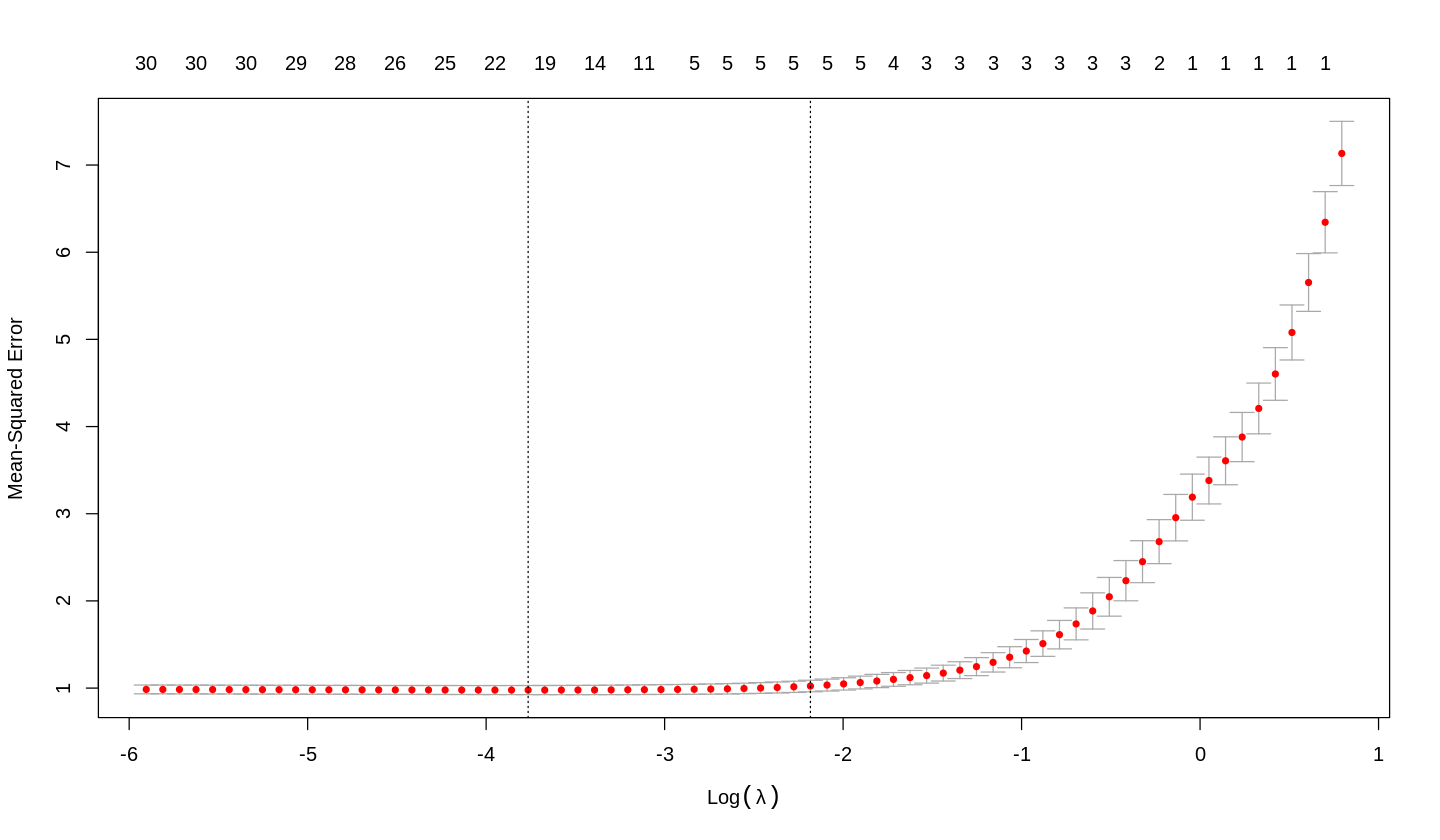

In [44]:
# Load required libraries
install.packages("glmnet")  # (Run once if not installed)
library(glmnet)  # For regularized regression like LASSO
library(dplyr)   # For data manipulation

# Prepare data
# (Uncomment and adjust if you want a custom version of db_lasso)
# db_lasso <- db01 %>%
#   select(total_points, team, x_p, assists, bonus, bps, clean_sheets, creativity,
#          expected_assists, expected_goals, goals_scored, influence,
#          minutes, own_goals, penalties_missed, selected, starts, threat,
#          transfers_balance, value) %>%
#   na.omit()  # Remove rows with missing values

# Convert categorical variable 'team' to dummy variables
x <- model.matrix(total_points ~ ., data = db03)[, -1]  # Create matrix of predictors (excluding intercept column)
y <- db03$total_points  # Target variable (total points)

# ⚙️ Fit LASSO using cross-validation
set.seed(123)  # For reproducibility
cv_fit <- cv.glmnet(x, y, alpha = 1, standardize = TRUE)
# Perform LASSO (alpha = 1) with automatic lambda tuning via cross-validation

# Optimal lambda
best_lambda <- cv_fit$lambda.min  # Best lambda minimizing mean cross-validated error
cat("Best lambda:", best_lambda, "\n")

# Plot cross-validation error curve
plot(cv_fit)  # Shows how model error changes as lambda increases

# Extract coefficients at best lambda
coef(cv_fit, s = "lambda.min")  # Show which variables are kept/shrunk

# Predict fitted values (optional)
pred <- predict(cv_fit, newx = x, s = "lambda.min")  # Make predictions using the selected lambda

What this does:

- Automatically selects the most predictive variables for total_points using LASSO regularization.
- Shrinks less important coefficients to zero — great for feature selection.
- Uses cross-validation to find the optimal penalty (lambda.min).

In [45]:
# Assuming `lasso_coef` is your sparse matrix from coef(cv_fit, s = "lambda.min")
lasso_coef <- coef(cv_fit, s = "lambda.min")
# Extract the coefficients from the best LASSO model (based on lambda.min)

# Convert to a tidy data frame
coef_gk <- as.matrix(lasso_coef) %>%                  # Convert the sparse matrix to a regular matrix
  as.data.frame() %>%                                 # Convert matrix to data frame
  tibble::rownames_to_column(var = "feature") %>%     # Move row names (variable names) into a column called "feature"
  rename(coefficient = s0)                            # Rename the column holding coefficients to "coefficient"

# Optional: filter only non-zero coefficients
coef_gk_nonzero <- coef_df %>%
  filter(coefficient != 0)  # Keep only the features selected by the LASSO (i.e., those with non-zero coefficients)

# View
print(coef_gk_nonzero)  # Display the non-zero coefficients and their associated features

             feature   coefficient
1        (Intercept)  1.205452e-01
2        teamArsenal  1.440590e-02
3      teamBrentford  1.279340e-01
4       teamBrighton  4.722621e-02
5        teamIpswich -3.789244e-02
6      teamLeicester -1.330540e-01
7      teamLiverpool  5.194770e-02
8          teamLuton -5.243236e-02
9      teamNewcastle -6.191713e-02
10 teamSheffield Utd -1.586181e-01
11         teamSpurs -1.330126e-02
12      clean_sheets  5.435566e+00
13        creativity  7.247358e-02
14         influence  3.018804e-02
15           minutes  2.328933e-03
16   penalties_saved  5.212978e+00
17             saves  1.841827e-01
18          selected  1.270823e-08
19 transfers_balance  2.419032e-07
20             value  6.259667e-02


In [46]:
install.packages("estimatr")  # (Run once) Install for robust regression tools
library(estimatr)  # Load package (used if running lm_robust)

# install.packages("modelsummary")  # (Optional) Install for pretty regression tables
# library(modelsummary)  # Load modelsummary (used if you want clean tables with stars)

# 💡 Optional robust version using lm_robust (commented out)
# ols_fwd_lasso <- lm_robust(
#     total_points ~ team + assists + creativity + expected_assists + expected_goals +
#       goals_scored + influence + minutes + own_goals + penalties_missed + starts +
#       threat + transfers_balance + value, data = db03, se_type = "stata")

# Basic OLS regression using only variables selected by LASSO
ols_gk_lasso <- lm(
  total_points ~ team + clean_sheets + creativity + influence +
    minutes + penalties_saved + saves + selected + transfers_balance +
    value, data = db03)

# View summary of the model: coefficients, R², significance levels, etc.
summary(ols_gk_lasso)

# (Optional) Generate a clean regression table with significance stars
# modelsummary(ols_gk_lasso, stars = TRUE)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




Call:
lm(formula = total_points ~ team + clean_sheets + creativity + 
    influence + minutes + penalties_saved + saves + selected + 
    transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.3319 -0.6047 -0.0442  0.6390  5.1679 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -2.303e-01  4.967e-01  -0.464   0.6430    
teamArsenal        -1.396e-02  1.708e-01  -0.082   0.9349    
teamAston Villa    -2.093e-01  1.633e-01  -1.282   0.2001    
teamBournemouth    -1.062e-01  1.760e-01  -0.603   0.5463    
teamBrentford       1.150e-01  1.753e-01   0.656   0.5120    
teamBrighton        5.614e-02  1.779e-01   0.316   0.7524    
teamBurnley        -9.204e-02  2.094e-01  -0.439   0.6604    
teamChelsea        -4.668e-02  1.731e-01  -0.270   0.7875    
teamCrystal Palace -2.065e-01  1.755e-01  -1.177   0.2395    
teamEverton        -8.465e-02  1.727e-01  -0.490   0.6241    
teamFulham         -8.685e-02 

This version runs an OLS regression using only the LASSO-retained predictors, helping you evaluate their statistical significance more traditionally (p-values, R², etc.).

In [47]:
# ols_fwdsw <- step(ols_fwd_base, direction = "both")
ols_gksw <- step(ols_gk_base, direction = "both")
# Perform stepwise regression starting from the full model (ols_fwd_base)
# direction = "both" allows both forward selection and backward elimination
# The algorithm chooses the best subset of predictors based on AIC (Akaike Information Criterion)

summary(ols_gksw)
# Show the summary of the final model chosen by stepwise selection:
# includes coefficients, p-values, R², and diagnostic metrics

Start:  AIC=-35.44
total_points ~ team + clean_sheets + creativity + expected_goal_involvements + 
    influence + minutes + penalties_saved + saves + selected + 
    starts + threat + transfers_balance + value

                             Df Sum of Sq    RSS     AIC
- team                       22      22.6 1325.1  -55.25
- selected                    1       0.0 1302.4  -37.44
- threat                      1       0.1 1302.5  -37.31
- expected_goal_involvements  1       0.2 1302.7  -37.19
- starts                      1       0.5 1302.9  -36.92
- transfers_balance           1       1.7 1304.2  -35.56
<none>                                    1302.4  -35.44
- value                       1       2.0 1304.4  -35.32
- minutes                     1       2.2 1304.7  -35.02
- influence                   1      22.1 1324.6  -13.79
- creativity                  1      37.1 1339.5    1.95
- saves                       1      37.4 1339.9    2.36
- penalties_saved             1     472.8 1775.


Call:
lm(formula = total_points ~ clean_sheets + creativity + influence + 
    penalties_saved + saves + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5932 -0.5942 -0.0625  0.6326  5.1865 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.188e-01  2.946e-01  -0.403   0.6869    
clean_sheets       5.499e+00  6.375e-02  86.259  < 2e-16 ***
creativity         8.489e-02  1.303e-02   6.514 1.02e-10 ***
influence          2.878e-02  5.085e-03   5.659 1.84e-08 ***
penalties_saved    5.421e+00  2.432e-01  22.289  < 2e-16 ***
saves              2.075e-01  3.578e-02   5.800 8.17e-09 ***
transfers_balance  7.156e-07  4.424e-07   1.618   0.1060    
value              1.456e-01  6.117e-02   2.381   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9757 on 1396 degrees of freedom
Multiple R-squared:  0.8678,	Adjusted R-squared:  0.8672 
F-statistic

This method automatically selects a simpler, more efficient model by removing or adding predictors that improve the model's AIC. It's useful when you're unsure which combination of predictors performs best.

In [48]:
# install.packages("estimatr")  # (Run once) For robust regression tools
library(estimatr)  # Load for lm_robust if needed

# install.packages("modelsummary")  # (Optional) For clean regression output
# library(modelsummary)

# (Optional robust version using heteroskedasticity-consistent SEs)
# ols_fwd_stepwise <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + transfers_balance + value, data = db03, se_type = "stata")

# Standard OLS regression with predictors selected from stepwise procedure
ols_gk_stepwise <- lm(
  total_points ~ clean_sheets + creativity + influence + penalties_saved +
    saves + transfers_balance + value, data = db03)

summary(ols_gk_stepwise)
# View the summary: coefficients, significance levels, R², and diagnostics

# (Optional) Produce a nicely formatted regression table
# modelsummary(ols_fwd_stepwise, stars = TRUE)


Call:
lm(formula = total_points ~ clean_sheets + creativity + influence + 
    penalties_saved + saves + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5932 -0.5942 -0.0625  0.6326  5.1865 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.188e-01  2.946e-01  -0.403   0.6869    
clean_sheets       5.499e+00  6.375e-02  86.259  < 2e-16 ***
creativity         8.489e-02  1.303e-02   6.514 1.02e-10 ***
influence          2.878e-02  5.085e-03   5.659 1.84e-08 ***
penalties_saved    5.421e+00  2.432e-01  22.289  < 2e-16 ***
saves              2.075e-01  3.578e-02   5.800 8.17e-09 ***
transfers_balance  7.156e-07  4.424e-07   1.618   0.1060    
value              1.456e-01  6.117e-02   2.381   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9757 on 1396 degrees of freedom
Multiple R-squared:  0.8678,	Adjusted R-squared:  0.8672 
F-statistic

This model is leaner, based on variables chosen by the stepwise AIC approach — keeping only those that statistically and economically contribute to explaining total_points.

In [49]:
install.packages("MuMIn")  # (Run once) Install 'MuMIn' for model selection tools
library(MuMIn)  # Load the MuMIn package

options(na.action = "na.fail")
# Required by 'dredge': forces R to fail if missing data exists (ensures full variable combinations are valid)

ols_mumin <- get.models(
  dredge(ols_gk_base, rank = "AICc"), 1
)[[1]]
# Perform exhaustive model search using 'dredge', ranked by AICc (corrected AIC for small samples)
# 'get.models(..., 1)[[1]]' extracts the **best model** (lowest AICc) from the full model set

summary(ols_mumin)
# Display the summary of the best model: coefficients, R², significance levels, and residuals

Fixed term is "(Intercept)"




Call:
lm(formula = total_points ~ clean_sheets + creativity + influence + 
    penalties_saved + saves + transfers_balance + value + 1, 
    data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5932 -0.5942 -0.0625  0.6326  5.1865 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.188e-01  2.946e-01  -0.403   0.6869    
clean_sheets       5.499e+00  6.375e-02  86.259  < 2e-16 ***
creativity         8.489e-02  1.303e-02   6.514 1.02e-10 ***
influence          2.878e-02  5.085e-03   5.659 1.84e-08 ***
penalties_saved    5.421e+00  2.432e-01  22.289  < 2e-16 ***
saves              2.075e-01  3.578e-02   5.800 8.17e-09 ***
transfers_balance  7.156e-07  4.424e-07   1.618   0.1060    
value              1.456e-01  6.117e-02   2.381   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9757 on 1396 degrees of freedom
Multiple R-squared:  0.8678,	Adjusted R-squared:  0.8672 
F-

This approach performs an automated model selection across all possible combinations of predictors, not just forward/backward paths — using AICc as the selection criterion.

In [50]:
# install.packages("estimatr")  # (Run once) Install estimatr for robust regression
library(estimatr)  # Load estimatr (if using lm_robust)

# install.packages("modelsummary")  # (Optional) Install for nice summary tables
# library(modelsummary)

# Robust version (commented out): for heteroskedasticity-consistent standard errors
# ols_fwd_dredge <- lm_robust(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03, se_type = "stata")

# Standard OLS model with predictors chosen via MuMIn::dredge (best AICc model)
ols_gk_dredge <- lm(
  total_points ~ clean_sheets + creativity + influence + penalties_saved +
    saves + transfers_balance + value, data = db03)

summary(ols_gk_dredge)
# View regression output: coefficient estimates, significance, R², residual stats

# (Optional) Clean output table with significance stars
# modelsummary(ols_fwd_dredge, stars = TRUE)


Call:
lm(formula = total_points ~ clean_sheets + creativity + influence + 
    penalties_saved + saves + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5932 -0.5942 -0.0625  0.6326  5.1865 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.188e-01  2.946e-01  -0.403   0.6869    
clean_sheets       5.499e+00  6.375e-02  86.259  < 2e-16 ***
creativity         8.489e-02  1.303e-02   6.514 1.02e-10 ***
influence          2.878e-02  5.085e-03   5.659 1.84e-08 ***
penalties_saved    5.421e+00  2.432e-01  22.289  < 2e-16 ***
saves              2.075e-01  3.578e-02   5.800 8.17e-09 ***
transfers_balance  7.156e-07  4.424e-07   1.618   0.1060    
value              1.456e-01  6.117e-02   2.381   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9757 on 1396 degrees of freedom
Multiple R-squared:  0.8678,	Adjusted R-squared:  0.8672 
F-statistic

This final model reflects the most AICc-efficient subset from your original full model, selected via MuMIn::dredge.

In [51]:
install.packages("olsrr")  # (Run once) Install 'olsrr' for stepwise regression diagnostics
library(olsrr)  # Load the olsrr package

ols_step_both_p(ols_gk_base)
# Perform stepwise regression based on p-values:
# - Starts with the full model (ols_fwd_base)
# - Adds/removes variables one at a time
# - Chooses variables based on their statistical significance (p-value thresholds)
# - Stops when no further significant improvements can be made

# Output:
# - A step-by-step log of which variables were added or removed
# - Final model summary (AIC, R², etc.)



                                   Stepwise Summary                                    
-------------------------------------------------------------------------------------
Step    Variable                 AIC         SBC         SBIC        R2       Adj. R2 
-------------------------------------------------------------------------------------
 0      Base Model             6752.579    6763.073    2764.962    0.00000    0.00000 
 1      clean_sheets (+)       5140.333    5156.074    1152.957    0.68328    0.68306 
 2      influence (+)          4374.999    4395.988     388.815    0.81664    0.81637 
 3      penalties_saved (+)    3985.988    4012.224       1.262    0.86121    0.86091 
 4      creativity (+)         3957.572    3989.054     -27.028    0.86418    0.86379 
 5      saves (+)              3929.423    3966.153     -54.965    0.86707    0.86659 
 6      value (+)              3925.879    3967.856     -58.456    0.86759    0.86702 
------------------------------------------

This gives a p-value-based alternative to AIC-based stepwise methods — useful for quick, interpretable model refinement based on significance thresholds.

In [52]:
# install.packages("estimatr")  # (Run once) Install for robust standard error options
library(estimatr)  # Load for lm_robust (optional robust regression)

# install.packages("modelsummary")  # (Optional) Install for clean summary tables
# library(modelsummary)

# (Optional) Robust OLS version using heteroskedasticity-consistent SEs
# ols_fwd_olsrr <- lm_robust(
#     total_points ~ influence + assists + goals_scored + minutes + penalties_missed +
#       threat + starts + own_goals + creativity + value +
#       expected_goals + selected, data = db03, se_type = "stata")

# Standard OLS model using predictors selected via olsrr::ols_step_both_p()
ols_gk_olsrr <- lm(
  total_points ~ clean_sheets + influence + penalties_saved + creativity +
    saves + value, data = db03)

summary(ols_gk_olsrr)
# Show regression summary: estimates, standard errors, significance, and fit stats

# (Optional) Display a clean summary table with significance stars
# modelsummary(ols_fwd_olsrr, stars = TRUE)


Call:
lm(formula = total_points ~ clean_sheets + influence + penalties_saved + 
    creativity + saves + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5823 -0.5878 -0.0597  0.6382  5.1708 

Coefficients:
                 Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -0.098641   0.294556  -0.335   0.7378    
clean_sheets     5.503133   0.063733  86.347  < 2e-16 ***
influence        0.029087   0.005084   5.721 1.30e-08 ***
penalties_saved  5.416768   0.243332  22.261  < 2e-16 ***
creativity       0.084423   0.013037   6.475 1.31e-10 ***
saves            0.203838   0.035724   5.706 1.41e-08 ***
value            0.143866   0.061191   2.351   0.0189 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9763 on 1397 degrees of freedom
Multiple R-squared:  0.8676,	Adjusted R-squared:  0.867 
F-statistic:  1526 on 6 and 1397 DF,  p-value: < 2.2e-16


This model uses predictors identified via p-value-based stepwise selection `(ols_step_both_p())`, giving you a practical and statistically guided subset.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



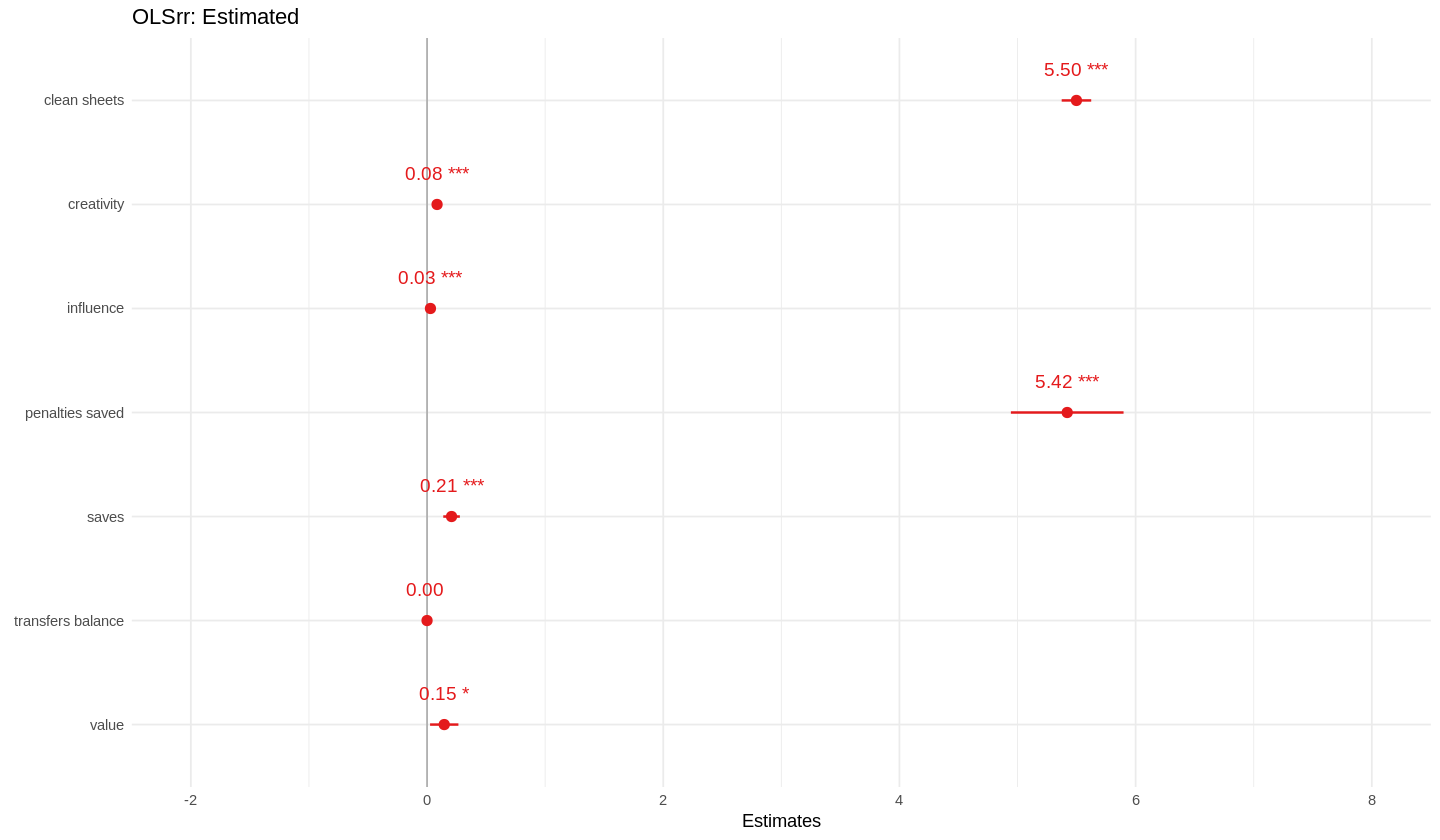

In [53]:
install.packages("gridExtra")  # (Run once) For arranging multiple plots
library(gridExtra)  # Load for grid-based plot arrangement

install.packages("sjPlot")  # (Run once) For plotting model summaries
library(sjPlot)  # Load for visualizing regression results

p1 <- plot_model(ols_gk_dredge,           # Use the model selected via MuMIn::dredge
                 type = "est",             # Plot unstandardized coefficient estimates
                 show.values = TRUE,       # Show the coefficient values next to the bars
                 value.offset = 0.3,       # Offset distance for the displayed values
                 title = "OLSrr: Estimated",  # Title for the plot
                 vline.color = "gray50") +    # Color of the vertical zero reference line
  theme_minimal()  # Apply a clean minimal theme

# Optional standardized version (commented out)
# p2 <- plot_model(ols_fwd_dredge,
#                  type = "std",           # Plot standardized coefficients (beta)
#                  show.values = TRUE,
#                  value.offset = 0.3,
#                  title = "OLSrr: Standardized",
#                  vline.color = "gray50") +
#   theme_minimal()

grid.arrange(p1, ncol = 1)  # Display the plot(s) in a grid layout (here: just p1 in 1 column)

This generates a visual summary of your regression coefficients, making it easier to interpret direction, size, and confidence intervals at a glance.

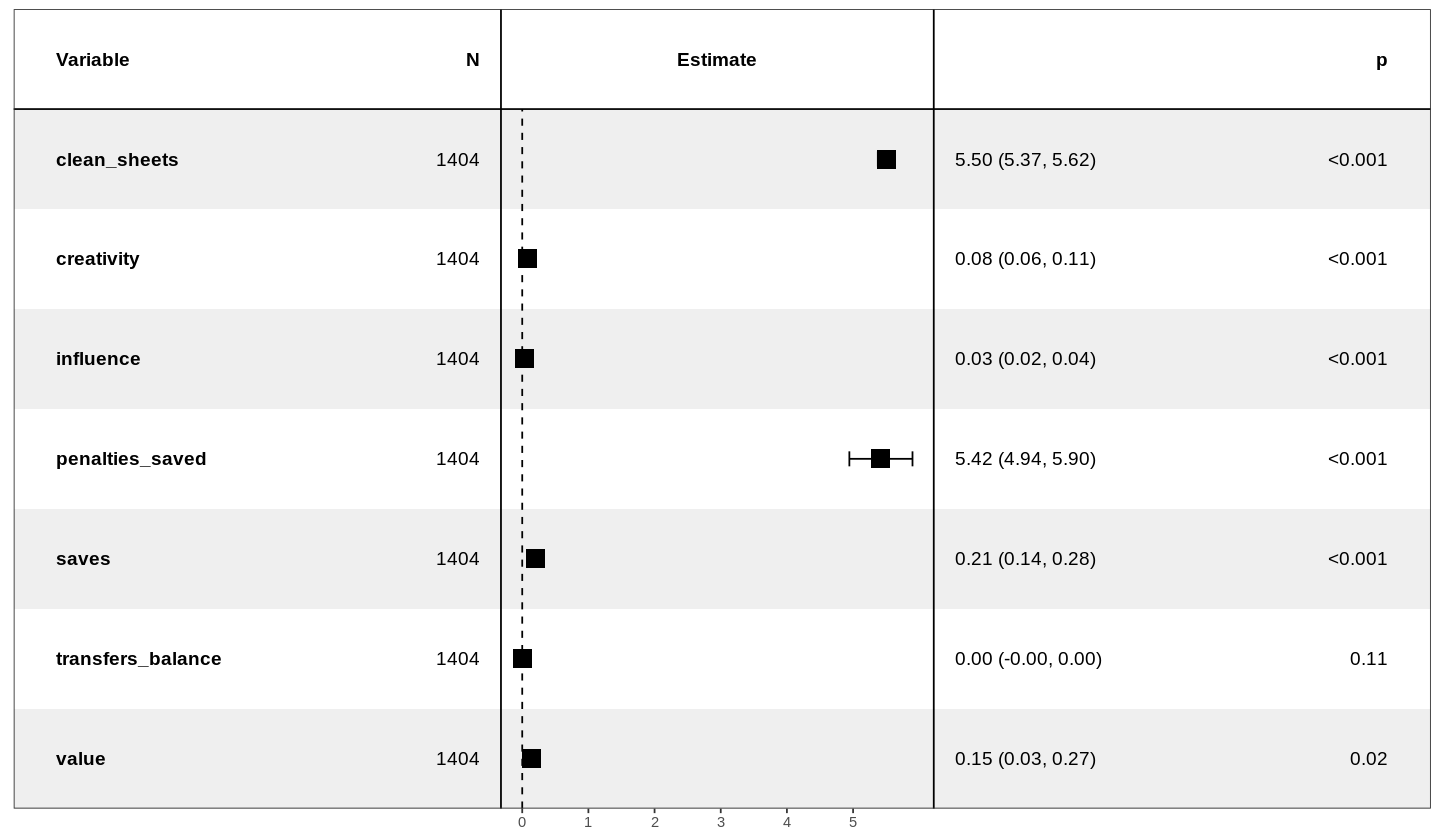

In [54]:
install.packages("forestmodel")  # (Run once) Install the 'forestmodel' package for forest-style coefficient plots

library(forestmodel)  # Load the package

forest_model(
  ols_gk_dredge,  # Use the final OLS model selected via MuMIn::dredge
  theme = theme_forest(),  # Apply a clean, publication-ready forest plot theme
  format_options = forest_model_format_options(text_size = 4)  # Adjust font size (smaller for compact display)
)

This creates a forest plot showing:
- Coefficient estimates
- 95% confidence intervals
- Significance visually (whether CI crosses zero)

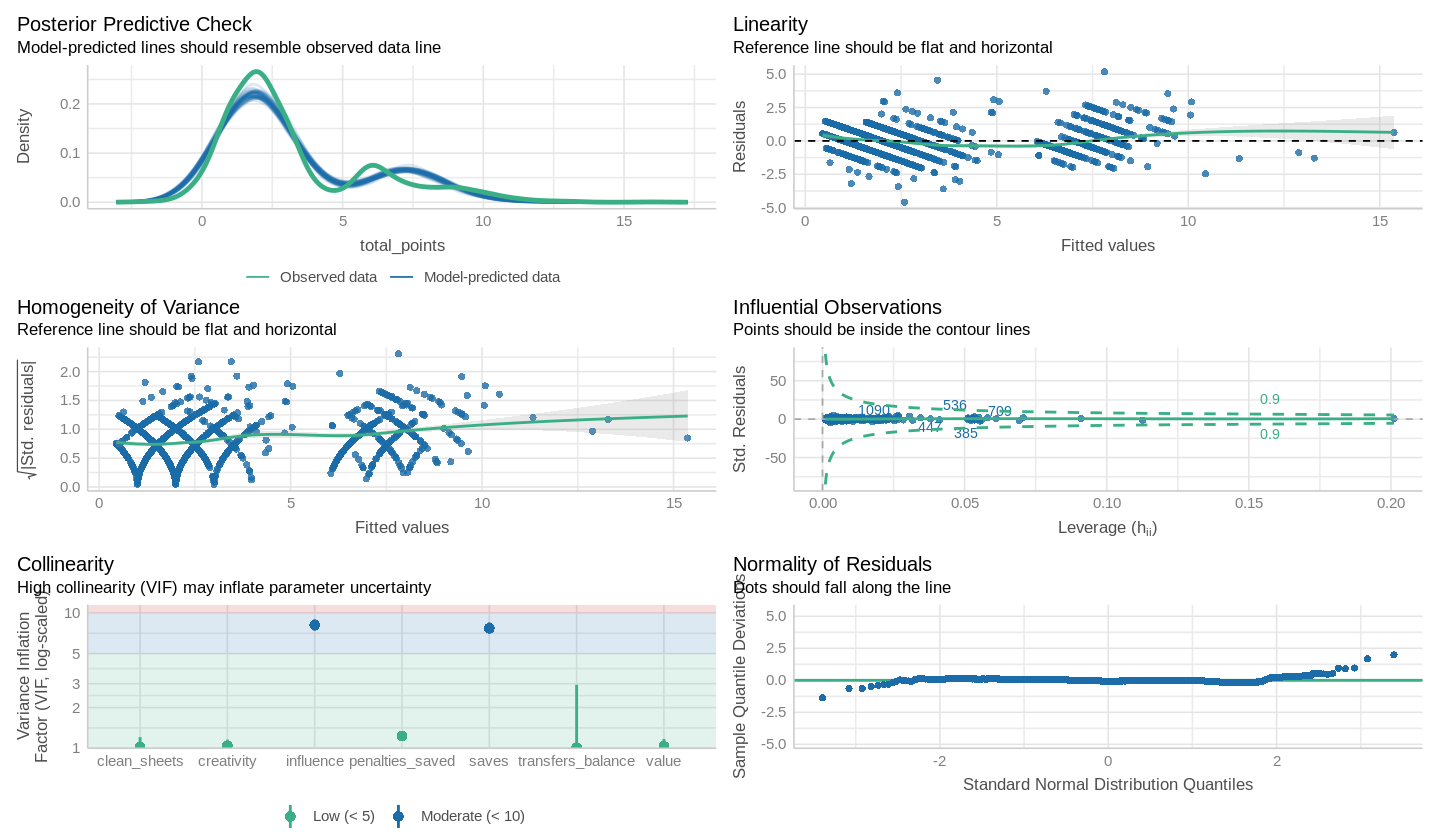

In [56]:
# install.packages("see")  # (Run once) Install 'see' for plotting model diagnostics

library(performance)  # Load for model checking tools (residuals, multicollinearity, etc.)
library(see)          # Load for visualizing performance checks

check_model(ols_gk_dredge)
# Automatically generates a panel of diagnostic plots:
# Residuals vs Fitted
# Normal Q-Q
# Scale-Location
# Cook’s Distance
# Leverage
# Multicollinearity (VIF)

# Great for quickly checking:
# - Linearity
# - Homoscedasticity
# - Influential observations
# - Normality of residuals
# - Multicollinearity

**A simple guide to interpreting the plots from `check_model()` in plain English:**

***Residuals vs Fitted***

> What to look for: Points should be randomly scattered around the horizontal line (y = 0).
> If you see a pattern (curve or funnel):
- Your model may have non-linearity or heteroskedasticity.
- Consider transforming variables or using a different model.


***Normal Q-Q (Quantile–Quantile Plot)***

> What to look for: Points should follow the diagonal line.
> If points deviate a lot at the ends:
- Your residuals may not be normally distributed.
- Normality matters most for inference (p-values, confidence intervals).

***Scale-Location (Spread–Location Plot)***

> What to look for: Points should be randomly spread with a flat trend.
> If it fans out or has a pattern:
- Your model may suffer from non-constant variance (heteroskedasticity).

***Cook’s Distance***

> What to look for: Most points should be low and similar in height.
- Tall spikes: Indicate influential points — data that heavily affects the model.
- Investigate these — they may be valid outliers or data entry issues.

***Leverage Plot***

> What to look for: Most points should be close to the left.
- Points far to the right: These have high leverage (unusual x-values).
- If also high in Cook’s Distance → potentially problematic outlier.

***Multicollinearity (VIF)***

> What to look for: VIF values should ideally be < 5.
- If VIF > 5–10: Suggests high multicollinearity — predictors may be too correlated.
- Consider removing or combining variables.

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 Model Summary:

Call:
lm(formula = total_points ~ clean_sheets + creativity + influence + 
    penalties_saved + saves + transfers_balance + value, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.5932 -0.5942 -0.0625  0.6326  5.1865 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -1.188e-01  2.946e-01  -0.403   0.6869    
clean_sheets       5.499e+00  6.375e-02  86.259  < 2e-16 ***
creativity         8.489e-02  1.303e-02   6.514 1.02e-10 ***
influence          2.878e-02  5.085e-03   5.659 1.84e-08 ***
penalties_saved    5.421e+00  2.432e-01  22.289  < 2e-16 ***
saves              2.075e-01  3.578e-02   5.800 8.17e-09 ***
transfers_balance  7.156e-07  4.424e-07   1.618   0.1060    
value              1.456e-01  6.117e-02   2.381   0.0174 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9757 on 1396 degrees of freedom
Multiple R-squared:  0.8678,	Adjusted R-squared:  0.

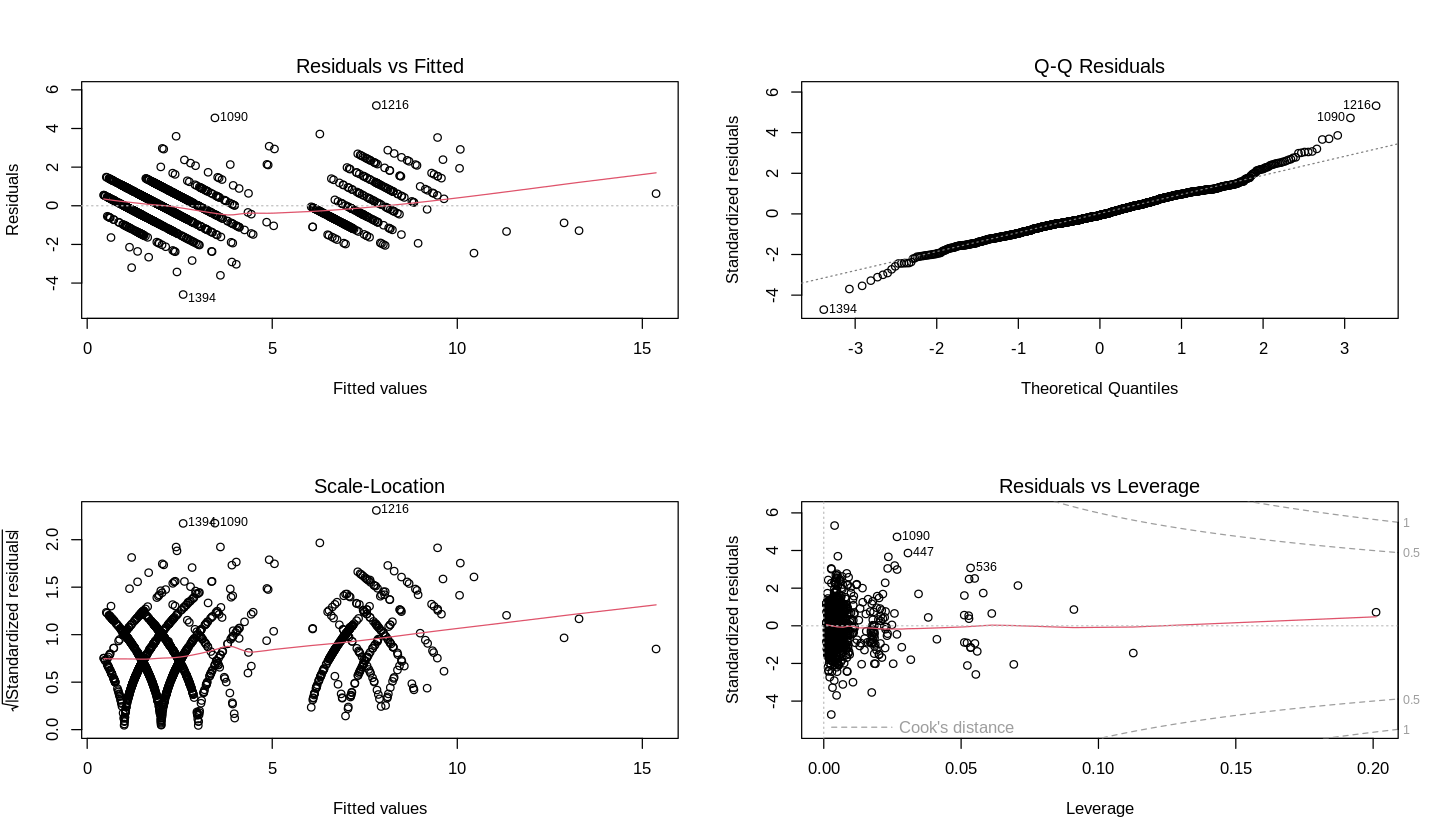

In [57]:
# Required packages
install.packages("car")       # (Run once) Provides tools like VIF and linearHypothesis
install.packages("lmtest")    # (Run once) Provides tests like Breusch–Pagan and Durbin–Watson

library(car)     # Load the 'car' package for regression diagnostics
library(lmtest)  # Load the 'lmtest' package for hypothesis testing and autocorrelation checks

# ---- 1. Model Summary ----
cat("\n Model Summary:\n")
print(summary(ols_gk_dredge))  # Display coefficients, R-squared, and p-values for your model

# ---- 2. Multicollinearity Check ----
cat("\n Variance Inflation Factor (VIF):\n")
print(vif(ols_gk_dredge))  # Check if any predictors are too correlated (VIF > 5 or 10 is a concern)

# ---- 3. Heteroskedasticity Test (Breusch–Pagan) ----
cat("\n Breusch–Pagan Test for Heteroskedasticity:\n")
print(bptest(ols_gk_dredge))  # Test whether residual variance is constant
# If p < 0.05 → your model may have heteroskedasticity (bad)

# ---- 4. Autocorrelation Check (Durbin-Watson) ----
cat("\n Durbin–Watson Test for Autocorrelation:\n")
print(dwtest(ols_gk_dredge))  # Test if residuals are correlated (esp. in time series)
# DW ~ 2 is ideal. Much < 2 suggests positive autocorrelation

# ---- 5. Normality of Residuals ----
cat("\n Shapiro-Wilk Test for Normality of Residuals:\n")
print(shapiro.test(residuals(ols_gk_dredge)))  # Test if residuals are normally distributed
# p > 0.05 means residuals are likely normal (a good thing)

# # ---- 6. Influence and Outlier Detection ----
# cat("\n Influential Observations (Cook's Distance > 4/n):\n")
# cooks_d <- cooks.distance(ols_fwd_dredge)        # Measure how much each observation influences the model
# n <- length(cooks_d)                             # Get the number of observations
# influential_obs <- which(cooks_d > (4 / n))      # Flag observations with high influence
# print(influential_obs)                           # Show their row numbers

# # ---- 7. Joint Hypothesis Test (All team dummies = 0) ----
# team_vars <- grep("^team", names(coef(ols_fwd_dredge)), value = TRUE)  # Find all team dummy variables
# cat("\n Joint Significance Test for All Team Variables:\n")
# print(linearHypothesis(ols_fwd_dredge, team_vars))  # Test if all team effects = 0 at once

# ---- 8. Residual Plots (Optional) ----
par(mfrow = c(2, 2))     # Arrange 4 plots in one 2x2 layout
plot(ols_gk_dredge)     # Generate diagnostic plots: residuals, Q-Q, leverage, etc.
par(mfrow = c(1, 1))     # Reset to default plotting layout

In [58]:
library(car)  # Load the 'car' package to use the VIF (Variance Inflation Factor) function

# Define a function to reduce multicollinearity by stepwise VIF elimination
vif_stepwise <- function(model, thresh = 5, trace = TRUE) {

  vifs <- vif(model)  # Calculate initial VIFs for all predictors

  while (any(vifs > thresh)) {  # Keep looping as long as at least one VIF exceeds the threshold

    var_to_drop <- names(which.max(vifs))  # Find the variable with the highest VIF

    if (trace) {
      cat("Dropping:", var_to_drop, "| VIF =", max(vifs), "\n")  # Print which variable is being dropped
    }

    fmla <- formula(model)  # Extract the model formula
    fmla <- update(fmla, paste(". ~ . -", var_to_drop))  # Update the formula by removing the high-VIF variable

    model <- lm(fmla, data = model$model)  # Refit the model with the reduced formula
    vifs <- vif(model)  # Recalculate VIFs
  }

  return(model)  # Return the final model with all VIFs below the threshold
}

What this function does:
- Automatically removes the most collinear variable one at a time (based on highest VIF).
- Stops when all remaining VIFs are below the given threshold (default = 5).
- Prints progress if trace = TRUE.

In [59]:
# Start with full model (commented out here — assumed already defined)
# ols_fwd_dredge <- lm(
#     total_points ~ assists + creativity + expected_goals + goals_scored +
#       influence + minutes + own_goals + penalties_missed + selected +
#       starts + threat + value, data = db03)

# Run VIF-guided backward selection
ols_gk_treated <- vif_stepwise(ols_gk_dredge, thresh = 5)
# This automatically drops predictors one by one if their VIF > 5,
# reducing multicollinearity from the model

# Review the refined model
summary(ols_gk_treated)
# Shows the final model after removing collinear predictors:
# includes coefficients, significance, and fit metrics

Dropping: influence | VIF = 8.131728 



Call:
lm(formula = fmla, data = model$model)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7248 -0.5963 -0.0464  0.6392  5.1797 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.232e-02  2.978e-01  -0.276  0.78227    
clean_sheets       5.513e+00  6.440e-02  85.604  < 2e-16 ***
creativity         9.900e-02  1.293e-02   7.655  3.6e-14 ***
penalties_saved    5.994e+00  2.236e-01  26.810  < 2e-16 ***
saves              3.958e-01  1.330e-02  29.767  < 2e-16 ***
transfers_balance  8.095e-07  4.469e-07   1.811  0.07031 .  
value              1.625e-01  6.177e-02   2.630  0.00862 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9865 on 1397 degrees of freedom
Multiple R-squared:  0.8648,	Adjusted R-squared:  0.8642 
F-statistic:  1489 on 6 and 1397 DF,  p-value: < 2.2e-16


In [60]:
library(car)      # For calculating Variance Inflation Factor (VIF)
library(tibble)   # For tidy conversion of row names into a column
library(dplyr)    # For data manipulation like sorting and renaming

# Calculate VIF and convert result into a clean tibble
vif_table <- vif(ols_gk_treated) %>%          # Compute VIFs for all predictors in the treated model
  as.data.frame() %>%                          # Convert the named vector to a data frame
  rownames_to_column(var = "Variable") %>%     # Move variable names from row names to a column
  rename(VIF = ".")                            # Rename the automatically generated column "." to "VIF"

# Optionally sort variables by descending VIF value
vif_table <- vif_table %>%
  arrange(desc(VIF))

# Print the final clean VIF table
print(vif_table)

           Variable      VIF
1             saves 1.041484
2             value 1.032561
3      clean_sheets 1.024807
4   penalties_saved 1.015369
5 transfers_balance 1.008643
6        creativity 1.005205


In [61]:
# install.packages("estimatr")  # (Run once) For robust standard errors
library(estimatr)  # Load if using lm_robust

# install.packages("modelsummary")  # (Optional) For clean regression tables
# library(modelsummary)

# (Optional robust version with heteroskedasticity-consistent standard errors)
# ols_gk_trtd <- lm_robust(
#     total_points ~ assists + creativity + expected_goals +
#     goals_scored + own_goals + penalties_missed +
#     selected + starts + threat + value, data = db03, se_type = "stata")

# Standard OLS regression using final, low-multicollinearity predictors
ols_gk_trtd <- lm(
  total_points ~ saves + value + clean_sheets + penalties_saved +
    transfers_balance + creativity, data = db03)

summary(ols_gk_trtd)
# Print model summary: coefficients, p-values, R², and diagnostic info

# Optional: create a clean, publication-style summary table
# modelsummary(ols_gk_trtd, stars = TRUE)


Call:
lm(formula = total_points ~ saves + value + clean_sheets + penalties_saved + 
    transfers_balance + creativity, data = db03)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7248 -0.5963 -0.0464  0.6392  5.1797 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)       -8.232e-02  2.978e-01  -0.276  0.78227    
saves              3.958e-01  1.330e-02  29.767  < 2e-16 ***
value              1.625e-01  6.177e-02   2.630  0.00862 ** 
clean_sheets       5.513e+00  6.440e-02  85.604  < 2e-16 ***
penalties_saved    5.994e+00  2.236e-01  26.810  < 2e-16 ***
transfers_balance  8.095e-07  4.469e-07   1.811  0.07031 .  
creativity         9.900e-02  1.293e-02   7.655  3.6e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9865 on 1397 degrees of freedom
Multiple R-squared:  0.8648,	Adjusted R-squared:  0.8642 
F-statistic:  1489 on 6 and 1397 DF,  p-value: < 2.2e-16


In [62]:
library(forestmodel)  # Load the package to create forest plots for regression models

# Create forest plot object from final OLS model
p_forest <- forest_model(
  ols_gk_trtd,                         # Use the VIF-treated regression model
  theme = theme_forest(),              # Apply a clean forest-style theme
  format_options = forest_model_format_options(text_size = 4)  # Set small font for compact display
)

# Save the plot to a PDF file
pdf("/content/drive/MyDrive/01fpl/forest_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device (A4 landscape size) to save the plot

# Arrange and render the plot
grid.arrange(
  grobs = list(p_forest),  # Put the forest plot in a list (can add more plots later)
  ncol = 1                  # Arrange in 1 column (i.e., single full-page plot)
)

dev.off()  # Close the PDF device and finalize the file

pdf 
  2

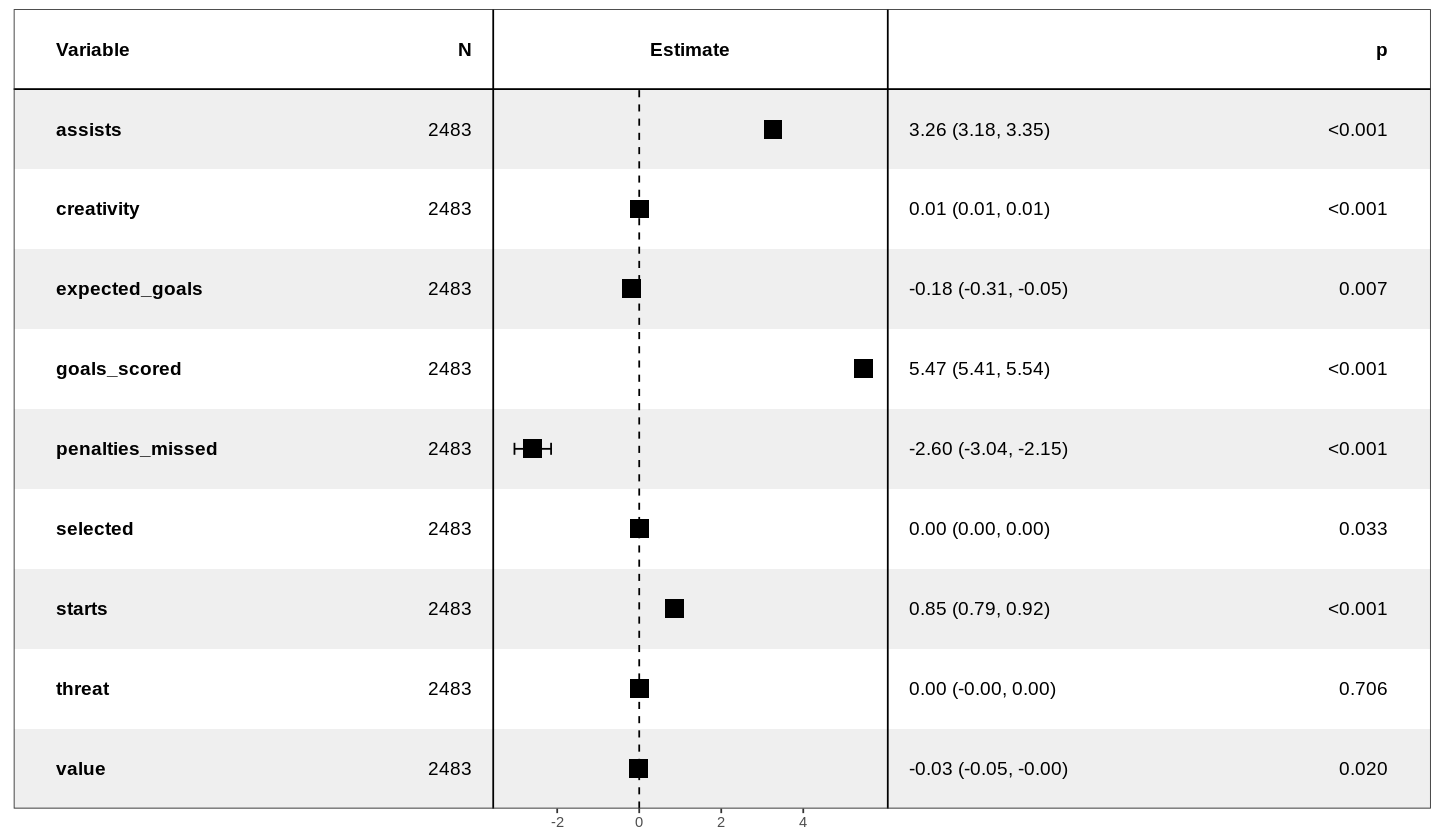

In [ ]:
p_forest

In [63]:
# install.packages("gridExtra")  # (Run once) For arranging plots
library(gridExtra)  # Load to use grid.arrange()

# install.packages("sjPlot")  # (Run once) For visualizing regression models
library(sjPlot)  # Load to use plot_model()

# Create a standardized coefficient plot
p_sj <- plot_model(
  ols_gk_trtd,                    # Use the final VIF-treated OLS model
  type = "std",                    # Plot standardized beta coefficients
  show.values = TRUE,              # Display coefficient values on the plot
  value.offset = 0.3,              # Move the text slightly away from the bars
  title = "OLSrr: Standardized",  # Title for the plot
  vline.color = "gray50"           # Vertical reference line at zero
) +
  theme_minimal()                  # Apply a clean theme

# Save the plot as a landscape A4 PDF
pdf("/content/drive/MyDrive/01fpl/sj_plot.pdf", width = 11.69, height = 8.27)
# Open a PDF device to write the plot

# Render the plot into the PDF
grid.arrange(
  grobs = list(p_sj),  # Place the plot into a list of grobs (plot objects)
  ncol = 1              # Arrange in 1 column
)

dev.off()  # Finalize and close the PDF device

pdf 
  2

In [65]:
# install.packages("stargazer")  # (Run once) Install stargazer for beautiful regression tables
library(stargazer)  # Load stargazer for formatting regression output

# Export a side-by-side regression table for 3 models
stargazer(
  # ols_gk_lasso,                # Model from stepwise selection
  ols_gk_dredge,                  # Model from AICc selection via MuMIn::dredge
  ols_gk_trtd,                    # Final model after VIF filtering
  type = "text",                   # Output format: plain text (other options: "html", "latex")
  out = "/content/drive/MyDrive/01fpl/ols_fwd_estimatr.txt"  # Save output to this text file
)


                                      Dependent variable:                  
                    -------------------------------------------------------
                                         total_points                      
                                (1)                         (2)            
---------------------------------------------------------------------------
clean_sheets                 5.499***                    5.513***          
                              (0.064)                     (0.064)          
                                                                           
creativity                   0.085***                    0.099***          
                              (0.013)                     (0.013)          
                                                                           
influence                    0.029***                                      
                              (0.005)                                      
           